In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
train_no_anom = pd.read_csv("../../data/01_raw/BATADAL_dataset03_train_no_anomaly.csv")
train_some_anom = pd.read_csv("../../data/01_raw/BATADAL_dataset04_train_some_anomaly.csv")
test_with_anom = pd.read_csv("../../data/01_raw/BATADAL_test_dataset_some_anomaly.csv")

In [3]:
# has leading white space
train_some_anom.columns = train_some_anom.columns.str.strip()

In [4]:
train_no_anom.shape, train_some_anom.shape, test_with_anom.shape

((8761, 45), (4177, 45), (2089, 44))

In [5]:
for i, _df in enumerate([train_no_anom, train_some_anom, test_with_anom]):
    for j, _df2 in enumerate([train_no_anom, train_some_anom, test_with_anom]):
        set1 = set(_df.columns.tolist())
        set2 = set(_df2.columns.tolist())
        
        print(i, j, len(set1 - set2))
        if len(set1 - set2) != 0:
            print("\t", set1-set2)

0 0 0
0 1 0
0 2 1
	 {'ATT_FLAG'}
1 0 0
1 1 0
1 2 1
	 {'ATT_FLAG'}
2 0 0
2 1 0
2 2 0


In [6]:
train_no_anom.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

# NAB
NAB expects a directly containing CSVs with `timestamp, value` as the columns. Therefore we will split each CSV into multiple CSVs as required

# Train no anomaly

In [7]:
SENSOR_COLS = [c for c in train_no_anom.columns if c not in ["DATETIME", "ATT_FLAG", "timestamp"]]

In [22]:
train_no_anom.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

# Train with anomaly to use as test set

In [17]:
train_some_anom["timestamp"] = pd.to_datetime(train_some_anom["DATETIME"], format="%d/%m/%y %H")
train_some_anom = train_some_anom.set_index(["timestamp"])

<AxesSubplot:xlabel='timestamp'>

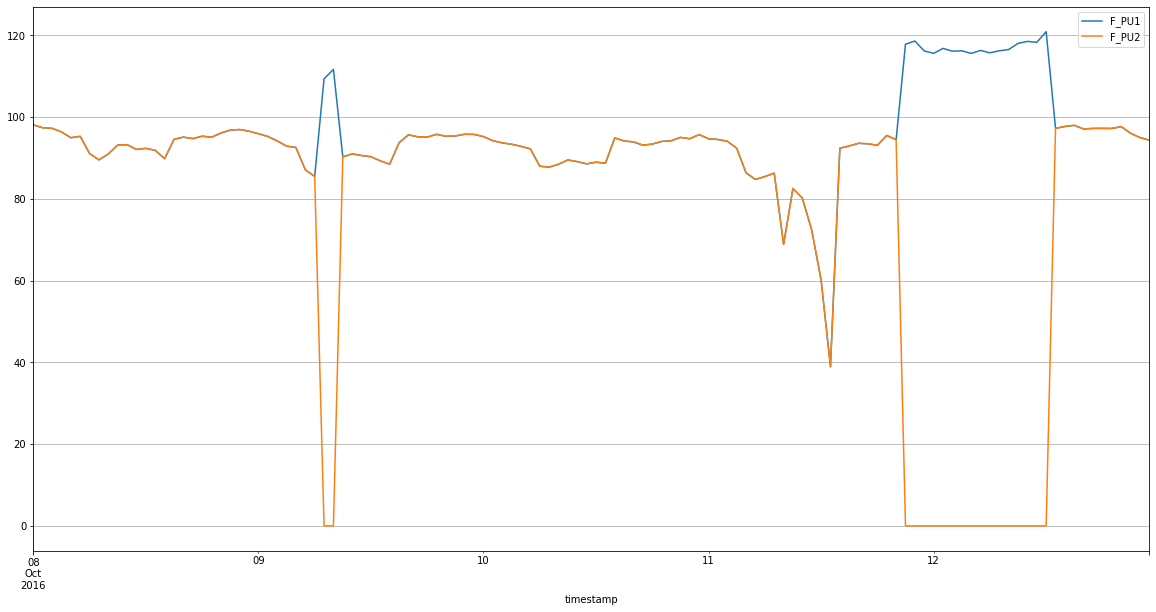

In [38]:
train_some_anom['2016-10-08':'2016-10-12'][["F_PU1", "F_PU2"]].plot(figsize=(20,10), grid=True)

<AxesSubplot:xlabel='timestamp'>

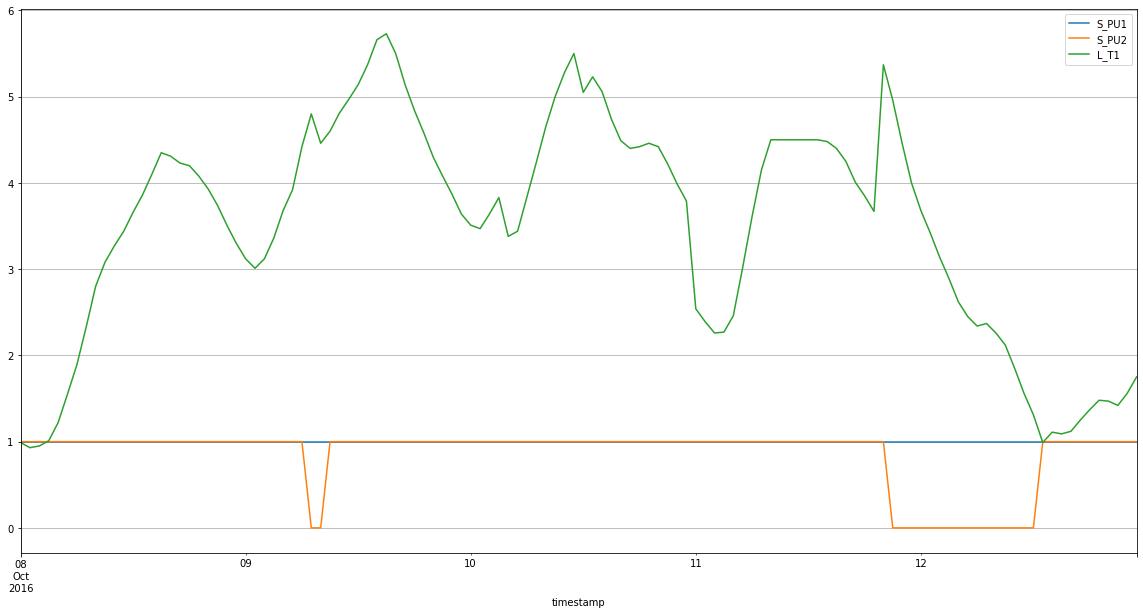

In [35]:
train_some_anom['2016-10-08':'2016-10-12'][["S_PU1", "S_PU2", "L_T1"]].plot(figsize=(20,10), grid=True)

# Actual test set

# Version 2: combined

As NAB finds anomalies at individual time series level by using previous time steps to predict future time steps, it is also worth experimenting with concatenating the three sets into one large set

In [ ]:
train_no_anom["timestamp"] = pd.to_datetime(train_no_anom["DATETIME"], format="%d/%m/%y %H")
train_no_anom = train_no_anom.set_index(["timestamp"])

In [ ]:
combined = pd.concat([
    train_no_anom.drop("ATT_FLAG", axis=1),
    train_some_anom.drop("ATT_FLAG", axis=1),
    test_with_anom
])

In [ ]:
combined["attack"] = combined["attack"].fillna(0)
combined["attack"].value_counts()

In [ ]:
combined_anomalies = train_anomalies_dt + test_anomalies_dt

In [ ]:
with open("/home/ec2-user/SageMaker/NAB/labels/batadal-labels-combined.json", 'w') as fp:
    json.dump(anomaly_dict, fp, indent=4)